## 📚 Student Score Prediction

This dataset contains information about students’ study hours and their corresponding exam scores.

The goal is to build a model to predict students' exam scores based on the number of hours they study.

The data is labeled, making it suitable for supervised learning, specifically a regression problem (predicting a continuous value: exam score).

It can be used to train machine learning models to identify the relationship between study hours and exam performance, and make predictions for new students based on their study habits.

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries</h1>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Load the Data</h1>

In [15]:
data = pd.read_csv(r"C:\Users\Teto\Desktop\Elevvo Pathways Interns\Student Score Prediction\StudentPerformanceFactors.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Preprocessing</h1>

In [16]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [18]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [19]:
data.duplicated().sum()

0

In [20]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [25]:
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)


In [26]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data



In [32]:
X = data.drop("Exam_Score", axis=1)
Y = data["Exam_Score"]

In [33]:
categorical_cols = ['Parental_Involvement',	'Access_to_Resources',	'Extracurricular_Activities', 'Motivation_Level',	'Internet_Access'
                    ,'Family_Income',	'Teacher_Quality',	'School_Type',	'Peer_Influence','Learning_Disabilities',	'Parental_Education_Level',	'Distance_from_Home',	'Gender']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

X    


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.50494151,  0.34837541, -0.25424875, ...,  0.14822148,
         0.74840713,  0.85574648],
       [-0.16282241, -1.38373605, -0.25424875, ..., -1.28350266,
        -0.74366466, -1.16857039],
       [ 0.67188249,  1.56085343,  0.90106177, ...,  1.57994561,
         0.74840713,  0.85574648],
       ...,
       [ 0.00411857,  0.86800885,  0.90106177, ...,  1.57994561,
         0.74840713, -1.16857039],
       [-1.66529123,  0.52158655, -1.40955928, ...,  0.14822148,
        -2.23573644, -1.16857039],
       [-0.83058633, -1.12391933,  0.90106177, ...,  1.57994561,
         0.74840713,  0.85574648]])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualize the Data</h1>

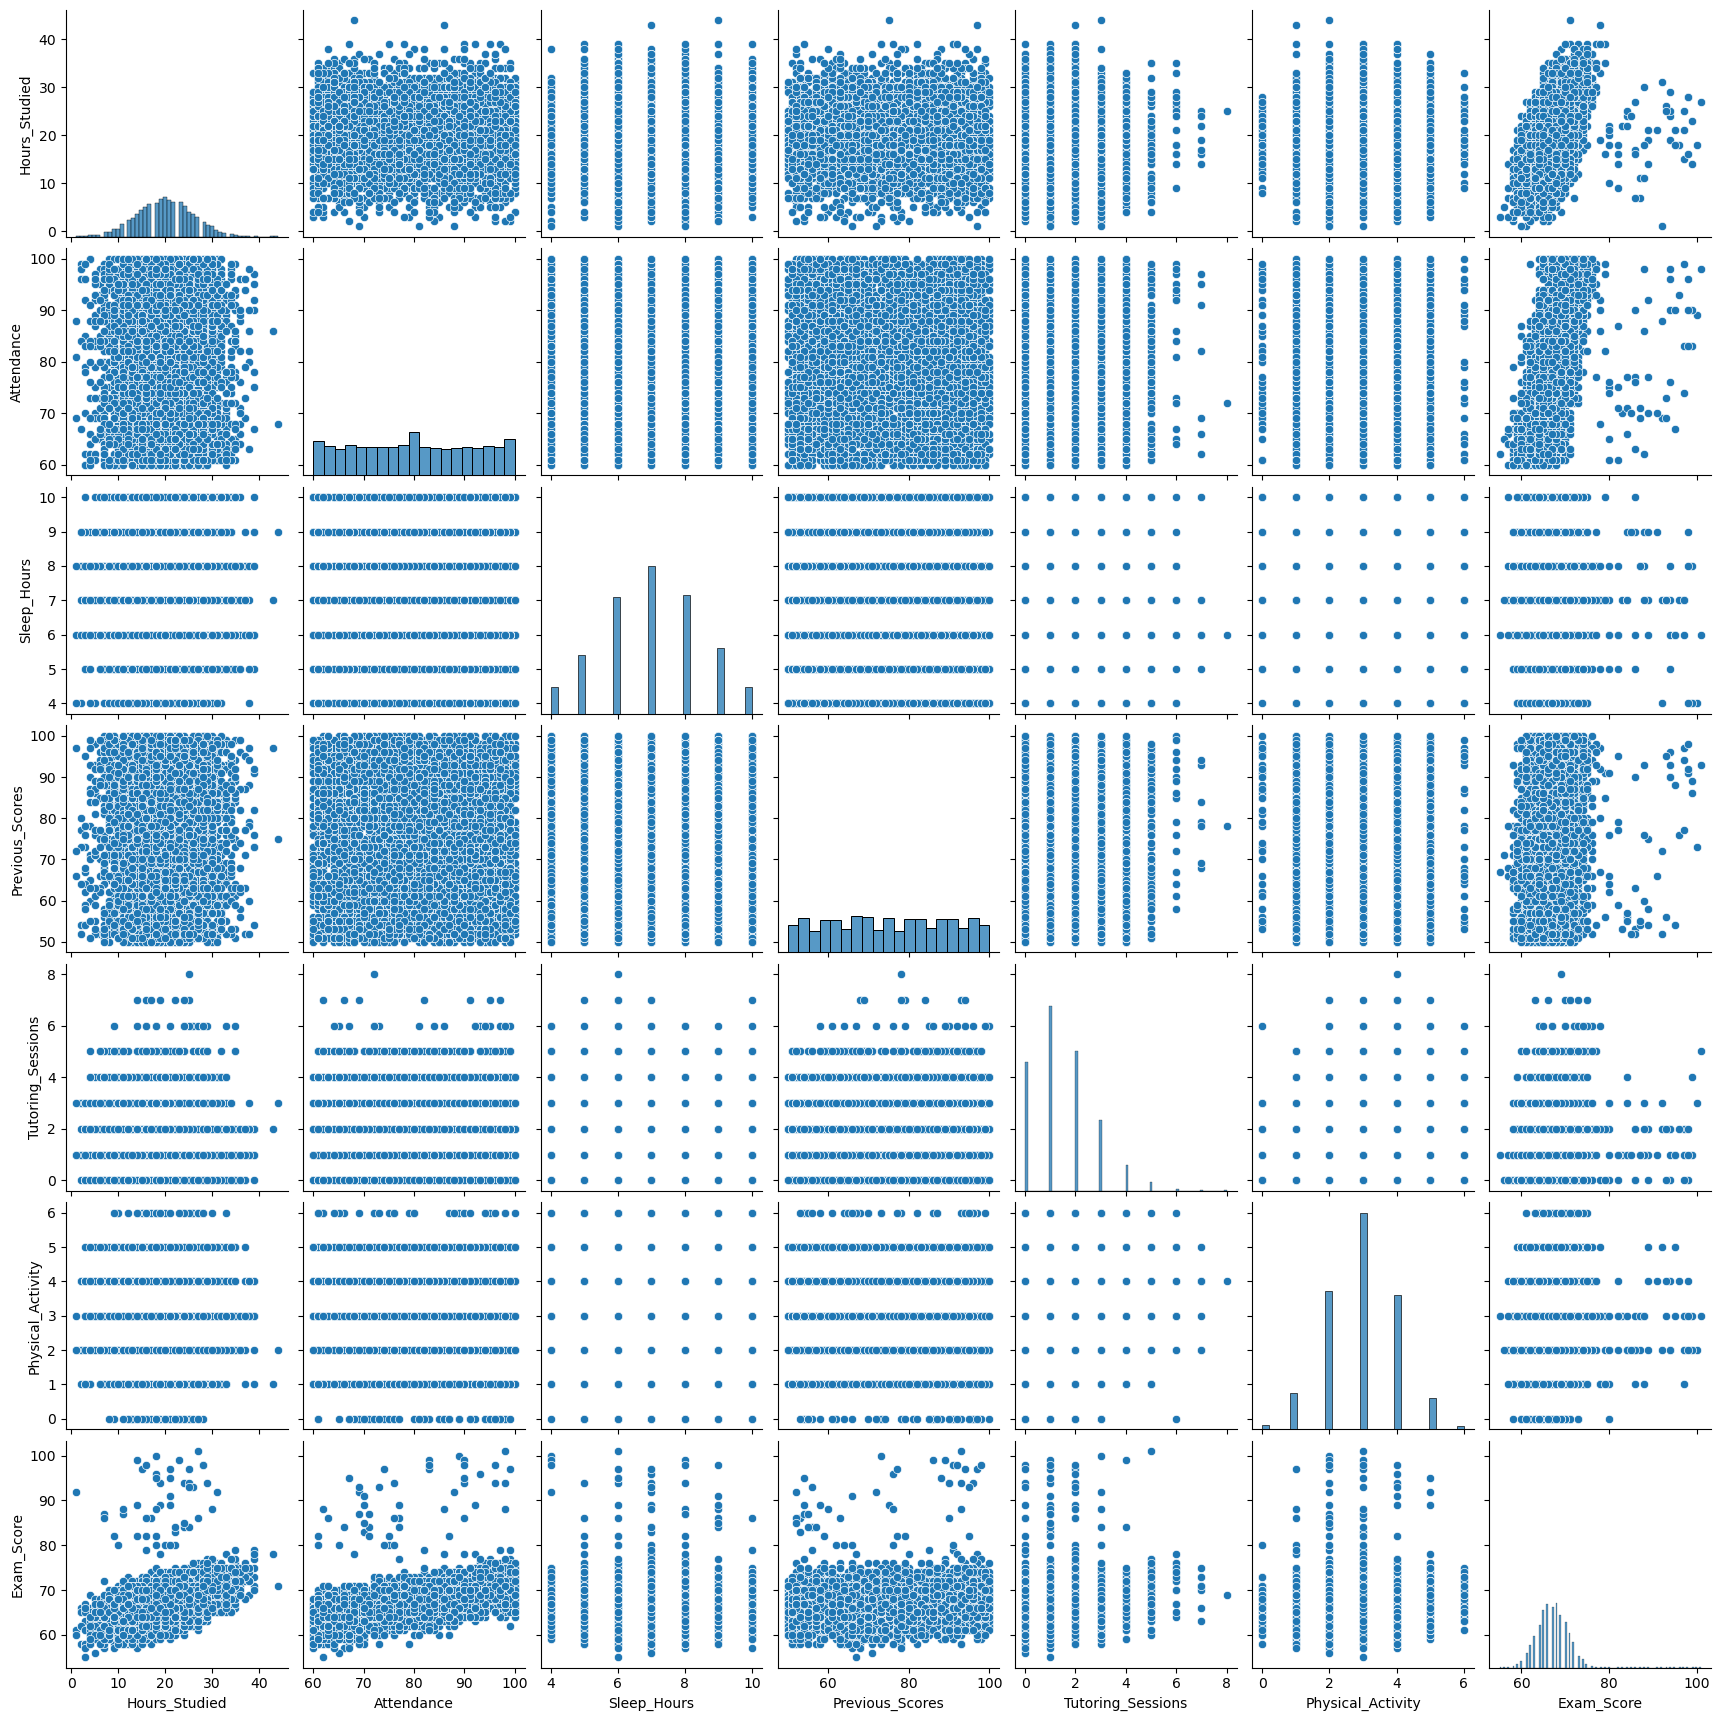

C:\Users\Teto\AppData\Local\Temp\ipykernel_24612\2557635647.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


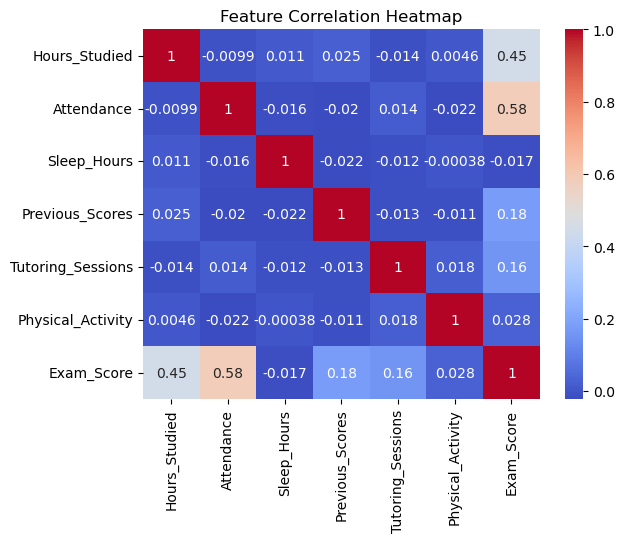

In [36]:
sns.pairplot(data)
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

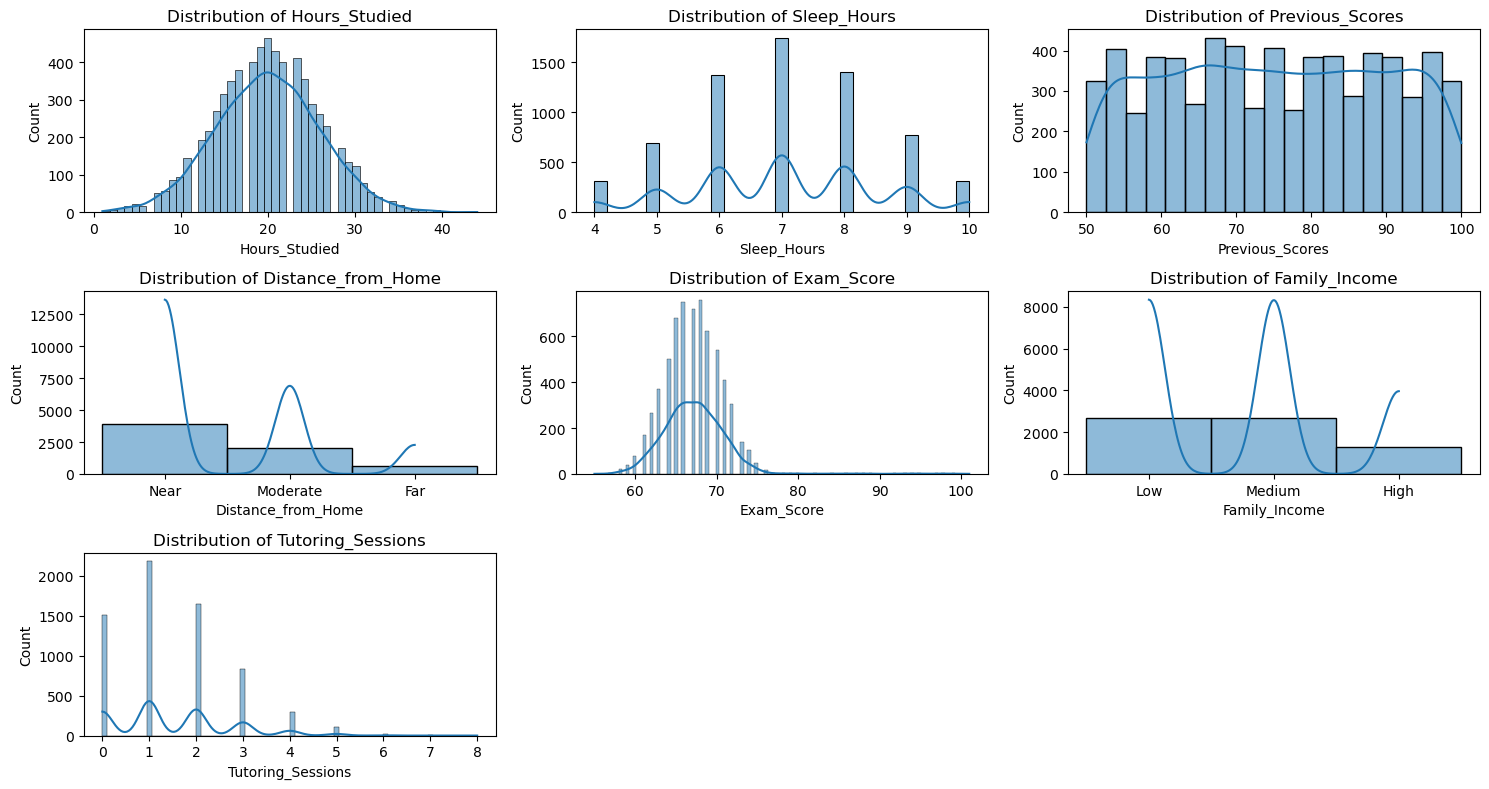

In [38]:
plt.figure(figsize=(15,8))
num_cols = ['Hours_Studied','Sleep_Hours','Previous_Scores',
            'Distance_from_Home','Exam_Score','Family_Income',
            'Tutoring_Sessions']
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


C:\Users\Teto\AppData\Local\Temp\ipykernel_24612\1501895267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Exam_Score", data=data, palette="Set2")


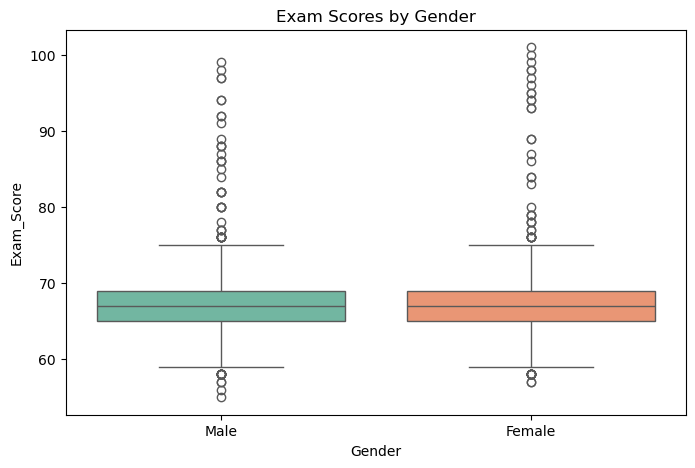

C:\Users\Teto\AppData\Local\Temp\ipykernel_24612\1501895267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="School_Type", y="Exam_Score", data=data, palette="Set3")


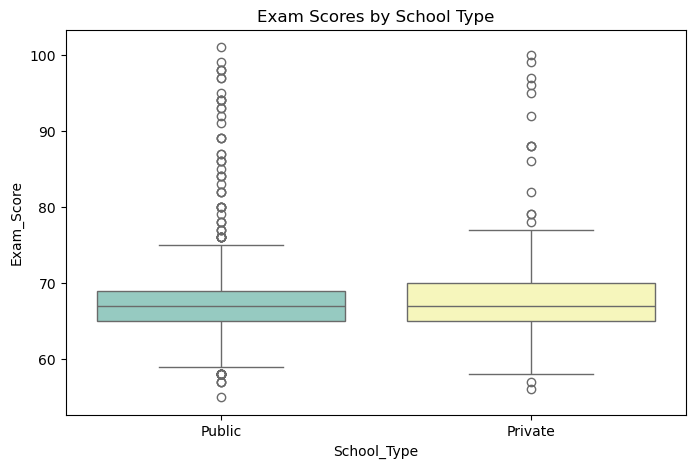

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="Exam_Score", data=data, palette="Set2")
plt.title("Exam Scores by Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="School_Type", y="Exam_Score", data=data, palette="Set3")
plt.title("Exam Scores by School Type")
plt.show()


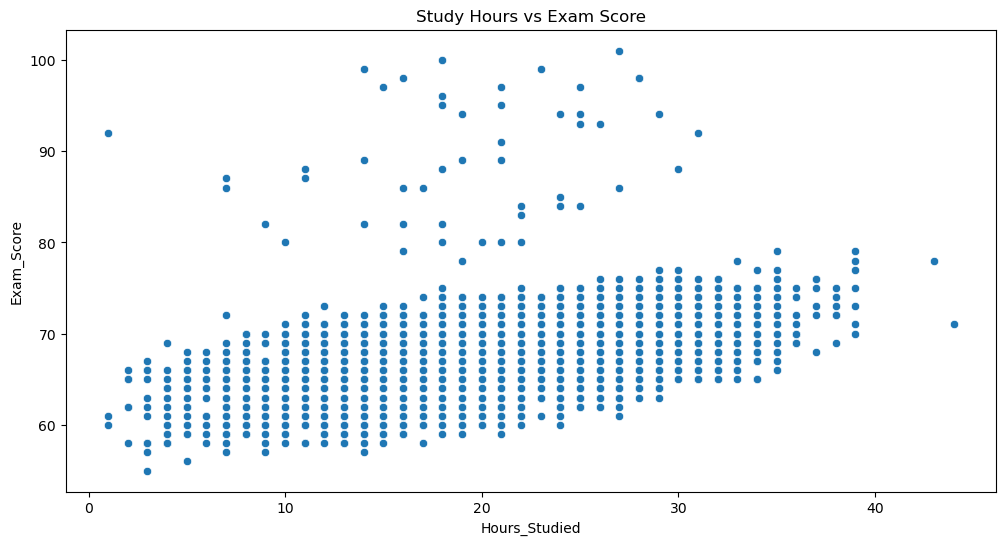

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'])
plt.title("Study Hours vs Exam Score")
plt.show()


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Spliting Data</h1>

In [46]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size = 0.2, random_state = 42)


X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (5285, 19)
Shape of X_test: (1322, 19)
Shape of y_train: (5285,)
Shape of y_test: (1322,)


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Models and Evalution </h1>

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [52]:
# Predictions
y_pred = lr_model.predict(X_test)


mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(Y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.02
MSE: 4.40
RMSE: 2.10
R² Score: 0.69


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Try Polynomial Regression</h1>

In [53]:
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)

# Predict
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate
mae = mean_absolute_error(Y_test, y_pred_poly)
mse = mean_squared_error(Y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_poly)

print("Polynomial Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Polynomial Regression Results:
MAE: 0.5562277507367376
RMSE: 1.8489409058545256
R²: 0.7581489249624546


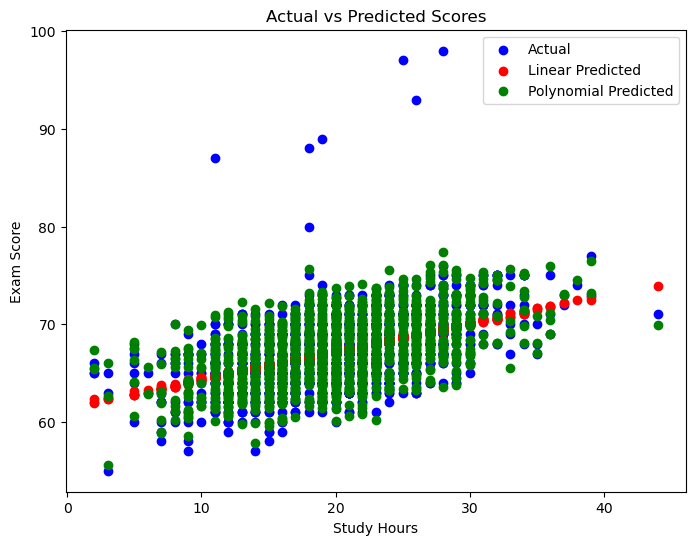

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(X_test['Hours_Studied'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['Hours_Studied'], y_pred, color='red', label='Linear Predicted')
plt.scatter(X_test['Hours_Studied'], y_pred_poly, color='green', label='Polynomial Predicted')

plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Actual vs Predicted Scores')
plt.show()
